In [194]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import sys
import pandas as pd
import geopandas as gpd
import xarray as xr
import io, requests
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)
import glob
from string import ascii_lowercase as alc

import scipy.stats as stats

from pyEDM import *

### Just to remove warnings to prettify the notebook. 
import warnings
warnings.filterwarnings("ignore")

In [49]:
sst_anoms = xr.open_dataset('./data/SST_anoms.nc')
swe_anoms = xr.open_dataset('./data/SWE_anoms.nc')

swe_by_eco_files = glob.glob('./data/snow_by_eco/*.nc')

In [280]:
for i in range(15):
    print(i, swe_by_eco_files[i])

0 ./data/snow_by_eco/snow_Klamath_Mountains.nc
1 ./data/snow_by_eco/snow_Middle_Rockies.nc
2 ./data/snow_by_eco/snow_Central_Basin_and_Range.nc
3 ./data/snow_by_eco/snow_Blue_Mountains.nc
4 ./data/snow_by_eco/snow_Canadian_Rockies.nc
5 ./data/snow_by_eco/snow_Eastern_Cascades_Slopes_and_Foothills.nc
6 ./data/snow_by_eco/snow_Wasatch_and_Uinta_Mountains.nc
7 ./data/snow_by_eco/snow_Sierra_Nevada.nc
8 ./data/snow_by_eco/snow_North_Cascades.nc
9 ./data/snow_by_eco/snow_Northern_Basin_and_Range.nc
10 ./data/snow_by_eco/snow_Columbia_Mountains_Northern_Rockies.nc
11 ./data/snow_by_eco/snow_Arizona_New_Mexico_Mountains.nc
12 ./data/snow_by_eco/snow_Southern_Rockies.nc
13 ./data/snow_by_eco/snow_Idaho_Batholith.nc
14 ./data/snow_by_eco/snow_Cascades.nc


In [11]:
ccm_results_1 = xr.open_dataset('./data/processed/ccm_SST_tau_1.nc')

In [25]:
ccm = ccm_results_1.sel(eco_region='Eastern Cascades Slopes and Foothills')

In [26]:
cbar_kwargs = {'shrink':0.8, 'aspect':40,
               'orientation':'horizontal', 'pad':0.01}

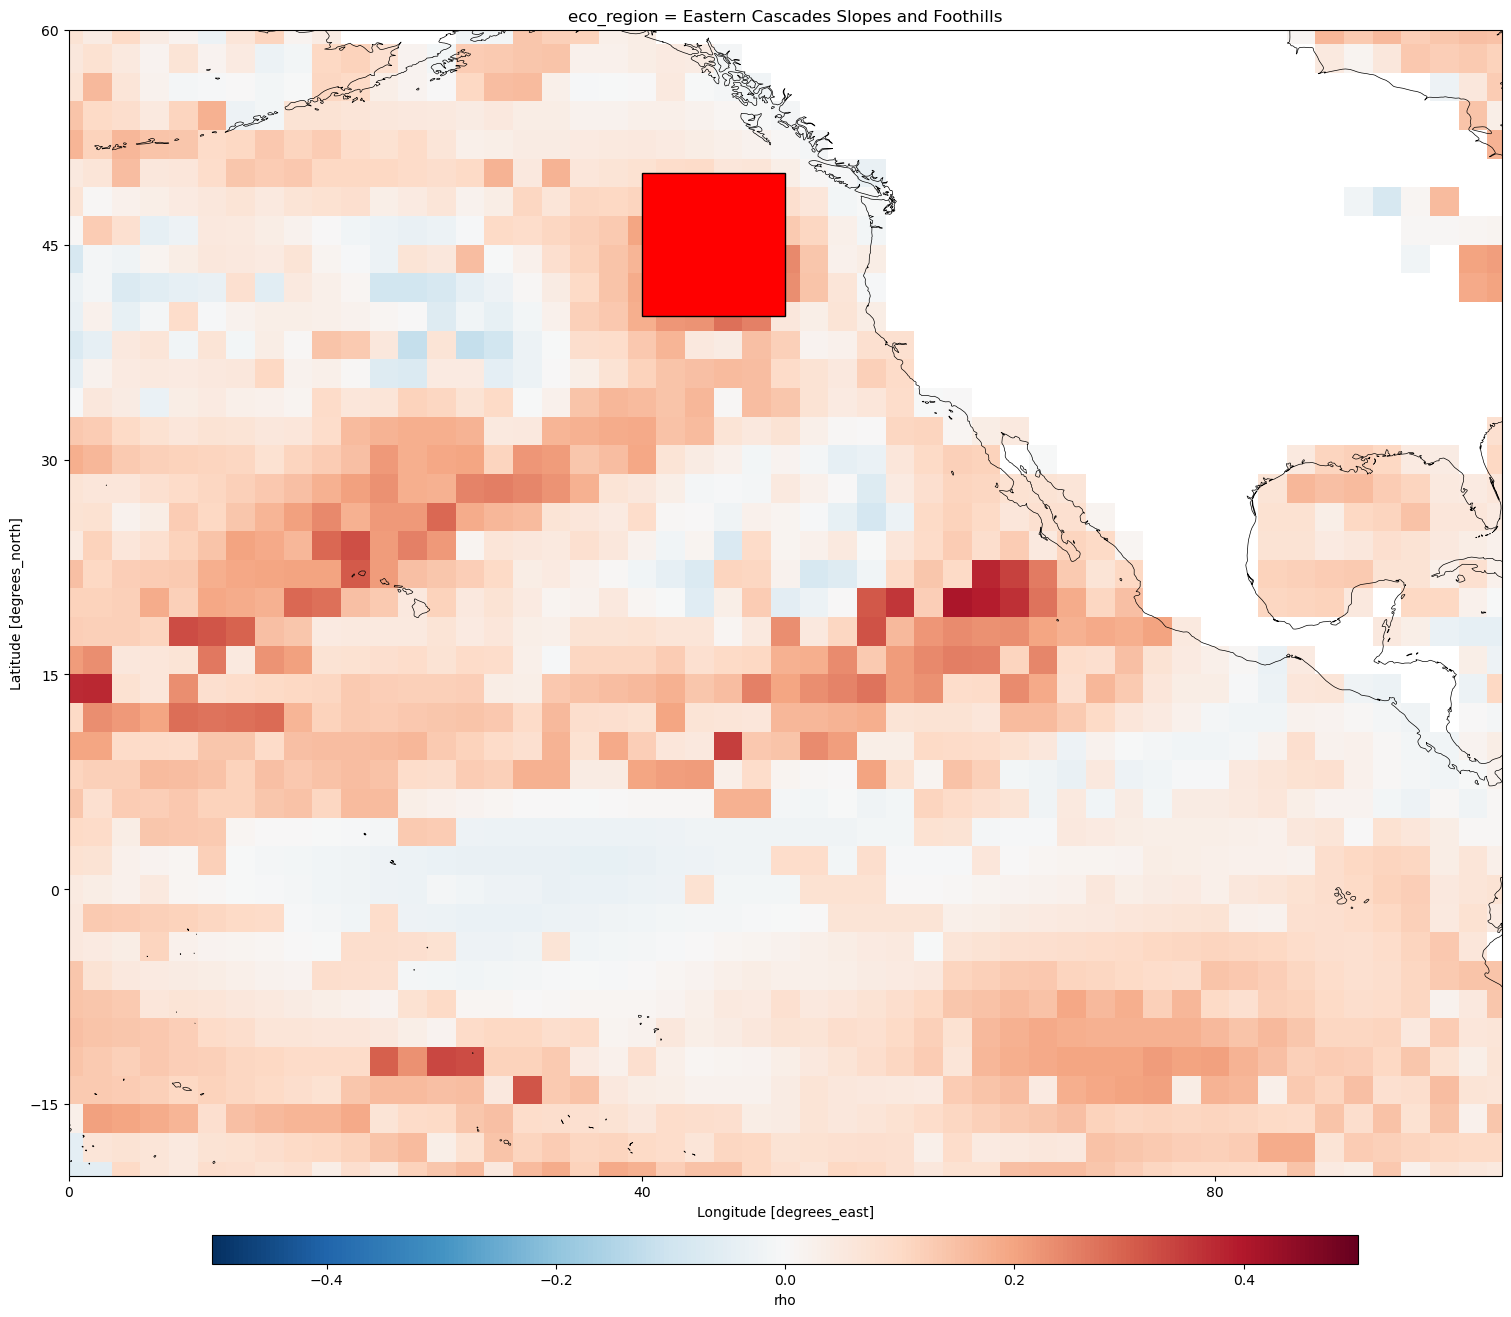

In [27]:
fig = plt.figure(figsize=(15, 15), constrained_layout=True)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines(resolution='50m', color='black', linewidth=0.5)
# ccm_xr.isel(eco_region=i).rho.plot(ax=ax,
#                                    cmap='RdBu_r',
#                                    vmin=-0.5, vmax=0.5,
#                                    transform=ccrs.PlateCarree(),
#                                    cbar_kwargs=cbar_kwargs)
ccm.rho.plot(ax=ax,
             cmap='RdBu_r',
             vmin=-0.5, vmax=0.5,
             transform=ccrs.PlateCarree(),
             cbar_kwargs=cbar_kwargs)
# sub.boundary.plot(ax=ax, color='b', linewidth=0.5)
# ax.set_title('')
# ax.set_title('{}) {}'.format(alc[i], eco_name), loc='left')
ax.set_extent([180, 280, -20, 60], crs=ccrs.PlateCarree())
ax.set_xticks([180, 220, 260], crs=ccrs.PlateCarree())
ax.set_yticks([-15, 0, 15, 30, 45, 60], crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)

rect = Rectangle((220,40),10,10, edgecolor='k', facecolor='r', transform=ccrs.PlateCarree())
ax.add_patch(rect)

In [29]:
rect.get_corners()

array([[220.,  40.],
       [230.,  40.],
       [230.,  50.],
       [220.,  50.]])

In [38]:
goa_sst = sst_anoms.sel(lat=slice(50,40), lon=slice(220,230))

In [35]:
sst_anoms

<xarray.Dataset>
Dimensions:  (lat: 41, lon: 51, time: 672)
Coordinates:
  * lat      (lat) float32 60.0 58.0 56.0 54.0 52.0 ... -14.0 -16.0 -18.0 -20.0
  * lon      (lon) float32 180.0 182.0 184.0 186.0 ... 274.0 276.0 278.0 280.0
  * time     (time) datetime64[ns] 1963-10-01 1963-11-01 ... 2019-09-01
Data variables:
    sst      (time, lat, lon) float32 ...

In [39]:
goa_sst

<xarray.Dataset>
Dimensions:  (lat: 6, lon: 6, time: 672)
Coordinates:
  * lat      (lat) float32 50.0 48.0 46.0 44.0 42.0 40.0
  * lon      (lon) float32 220.0 222.0 224.0 226.0 228.0 230.0
  * time     (time) datetime64[ns] 1963-10-01 1963-11-01 ... 2019-09-01
Data variables:
    sst      (time, lat, lon) float32 ...

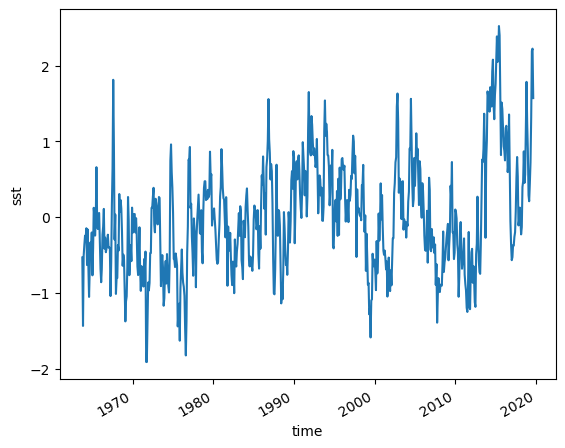

In [44]:
goa_sst.sst.mean(dim=['lat','lon']).plot()

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [347]:
swea_cascades = xr.open_dataset(swe_by_eco_files[-1])

In [348]:
swea_cascades_ts = swea_cascades.mean(dim='sites').dropna(dim='time')

In [349]:
# generate predicted SWE from SST
swe = swea_cascades_ts.to_dataframe()
sst = goa_sst.mean(dim=['lat','lon']).to_dataframe()

In [350]:
df = swe.join(sst)

In [351]:
df = df.dropna()
df = df.reset_index()
# df = df.drop(['lat', 'lon'], axis=1)

df['time'] = df['time'].map(lambda x: x.isoformat())

,time,swe_level2,sst
0,1978-10-01T00:00:00,-0.523846,0.070282
1,1978-11-01T00:00:00,-0.582581,0.386935
2,1978-12-01T00:00:00,-0.449708,0.474465
3,1979-01-01T00:00:00,-0.730925,0.474786
4,1979-02-01T00:00:00,-0.564041,0.226544
...,...,...,...
487,2019-05-01T00:00:00,-0.279344,0.724249
488,2019-06-01T00:00:00,-0.245479,1.322131
489,2019-07-01T00:00:00,-0.271610,2.194706
490,2019-08-01T00:00:00,-0.211882,2.224361


In [353]:
L = len(df)

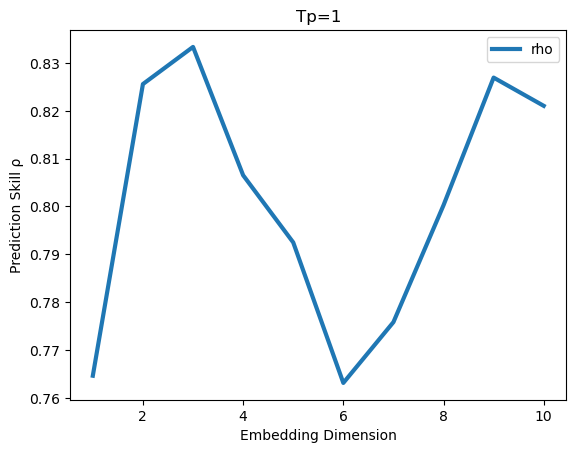

In [354]:
d = EmbedDimension(
    dataFrame=df,
    lib=[1,100],
    pred=[201, L],
    columns=['sst'],
    target='sst',
    showPlot=True
)

In [355]:
E = d[d['rho'] == d['rho'].max()]['E'].iloc[0]
print(E)

3


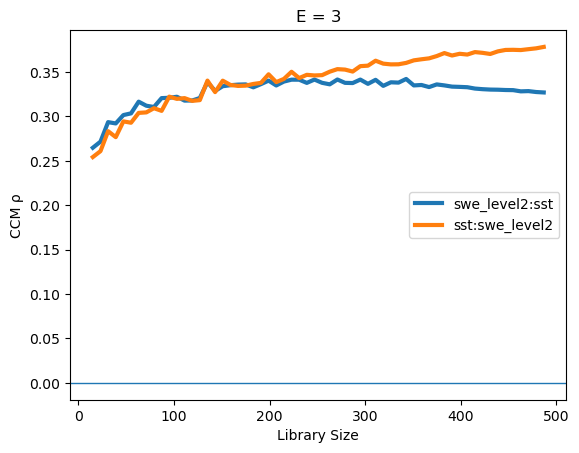

In [364]:
maxN = L - (E+1)

df = df[['time', 'sst', 'swe_level2']]

# look at orange line!
pyedm_res = CCM(dataFrame=df,
               E = int(E),
               seed=30,
               tau=-1,
               columns='swe_level2',
               target='sst',
               libSizes=[15,maxN-1,8],
               sample=100, 
               showPlot=True, returnObject=True)

In [365]:
pyedm_res.FwdMap.FindNeighbors()
pyedm_res.FwdMap.Project()
pyedm_res.FwdMap.FormatProjection()

ccm_results = pyedm_res.FwdMap.Projection

In [366]:
pyedm_res.RevMap.FindNeighbors()
pyedm_res.RevMap.Project()
pyedm_res.RevMap.FormatProjection()

ccm_results_r = pyedm_res.RevMap.Projection

<Axes: xlabel='Time'>

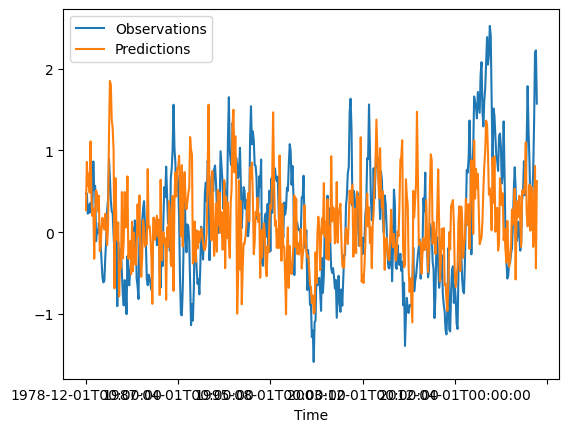

In [367]:
fig, ax = plt.subplots()
ccm_results.plot(ax=ax, x='Time', y='Observations')
ccm_results.plot(ax=ax, x='Time', y='Predictions')

<Axes: xlabel='Time'>

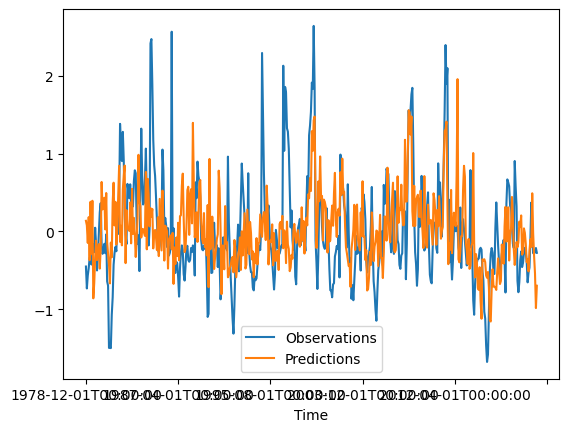

In [368]:
fig, ax = plt.subplots()
ccm_results_r.plot(ax=ax, x='Time', y='Observations')
ccm_results_r.plot(ax=ax, x='Time', y='Predictions')

In [369]:
stats.pearsonr(ccm_results.Observations, ccm_results.Predictions)

PearsonRResult(statistic=0.3270645998843304, pvalue=1.1141209928249191e-13)

In [370]:
stats.pearsonr(ccm_results_r.Observations, ccm_results_r.Predictions)

PearsonRResult(statistic=0.3774328247707013, pvalue=4.899012221722124e-18)

In [330]:
ts = swea_cascades_ts.to_array().to_numpy().reshape(-1)

In [331]:
def acf(x,n):
#Auto Correlation function where x
# is the timeseries and n is the number
# of lags to calculate
    nn = x.shape[0]
    acf = np.zeros((n,2))# Stores the r and p values for each lag
    for lag in range(n):
        acf[lag,:] = stats.pearsonr(x[:nn-lag], x[lag:])
    return acf

alpha = 0.05 #Statistical Significance
nac = 7 #Number of lags to consider
rcl = acf(ts,nac)
rcl

array([[1.00000000e+00, 0.00000000e+00],
       [7.39198189e-01, 1.06938431e-92],
       [5.59624879e-01, 6.29885371e-45],
       [3.84347584e-01, 4.95024915e-20],
       [2.44414723e-01, 1.31573062e-08],
       [1.45876606e-01, 7.91809056e-04],
       [7.72949725e-02, 7.68143255e-02]])

In [332]:
n = ts.shape[0]
mu = ts.mean()
sx = ts.std(ddof=1)

r1 = rcl[1,0]
sigma_e = np.sqrt((n-1)*(1-r1**2)*(sx**2)/(n-2))

In [380]:
r2 = rcl[2,0]

In [381]:
c1 = (r1*(1-r2))/(1-r1**2)
c2 = (r2-r1**1)/(1-r1**2)

In [383]:
c1

0.7176686781629096

In [384]:
c2

-0.39589690852406684

In [389]:
sigma_e

0.48459783045096483

In [333]:
sswe = np.zeros(n)
et = stats.norm.rvs(0,1,n)
xt = ts[0]

In [334]:
for i in range(n):
    sswe[i] = mu + r1*(xt-mu)+et[i]*sigma_e
    xt = sswe[i]

In [335]:
df['AR1'] = sswe

In [336]:
ccm_results['dtime'] = ccm_results['Time'].map(lambda x: datetime.datetime.fromisoformat(x))

In [337]:
ccm_results

,Time,Observations,Predictions,Pred_Variance,dtime
0,1974-12-01T00:00:00,-0.010610,-0.503532,0.435345,1974-12-01
1,1975-01-01T00:00:00,0.682465,-0.436133,0.377738,1975-01-01
2,1975-02-01T00:00:00,0.514093,-0.285997,0.132129,1975-02-01
3,1975-03-01T00:00:00,0.828601,-0.114625,0.485260,1975-03-01
4,1975-04-01T00:00:00,0.859431,-0.155559,0.357981,1975-04-01
...,...,...,...,...,...
519,2019-05-01T00:00:00,-0.754103,-0.487605,0.159718,2019-05-01
520,2019-06-01T00:00:00,-0.500688,-0.487028,0.253949,2019-06-01
521,2019-07-01T00:00:00,-0.119939,-0.441776,0.286275,2019-07-01
522,2019-08-01T00:00:00,-0.258992,-0.230468,0.134052,2019-08-01


In [338]:
import datetime

datetime.datetime.fromisoformat(ccm_results.Time[0])

datetime.datetime(1974, 12, 1, 0, 0)

<Axes: xlabel='time'>

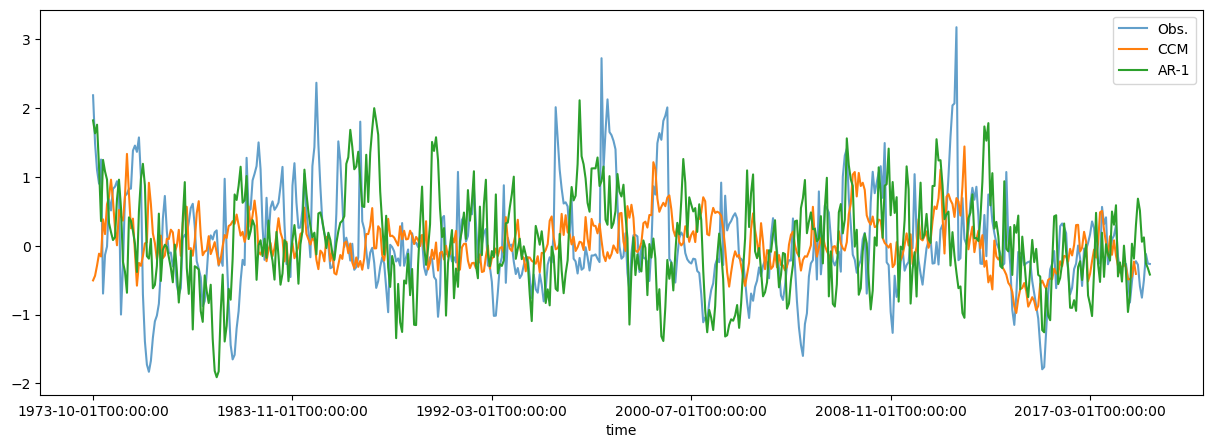

In [339]:
fig, ax = plt.subplots(figsize=(15,5))
df.plot(ax=ax, x='time', y='swe_level2', label='Obs.', alpha=0.7)
ccm_results.plot(ax=ax, x='Time', y='Predictions', label='CCM')
df.plot(ax=ax, x='time', y='AR1', label='AR-1')


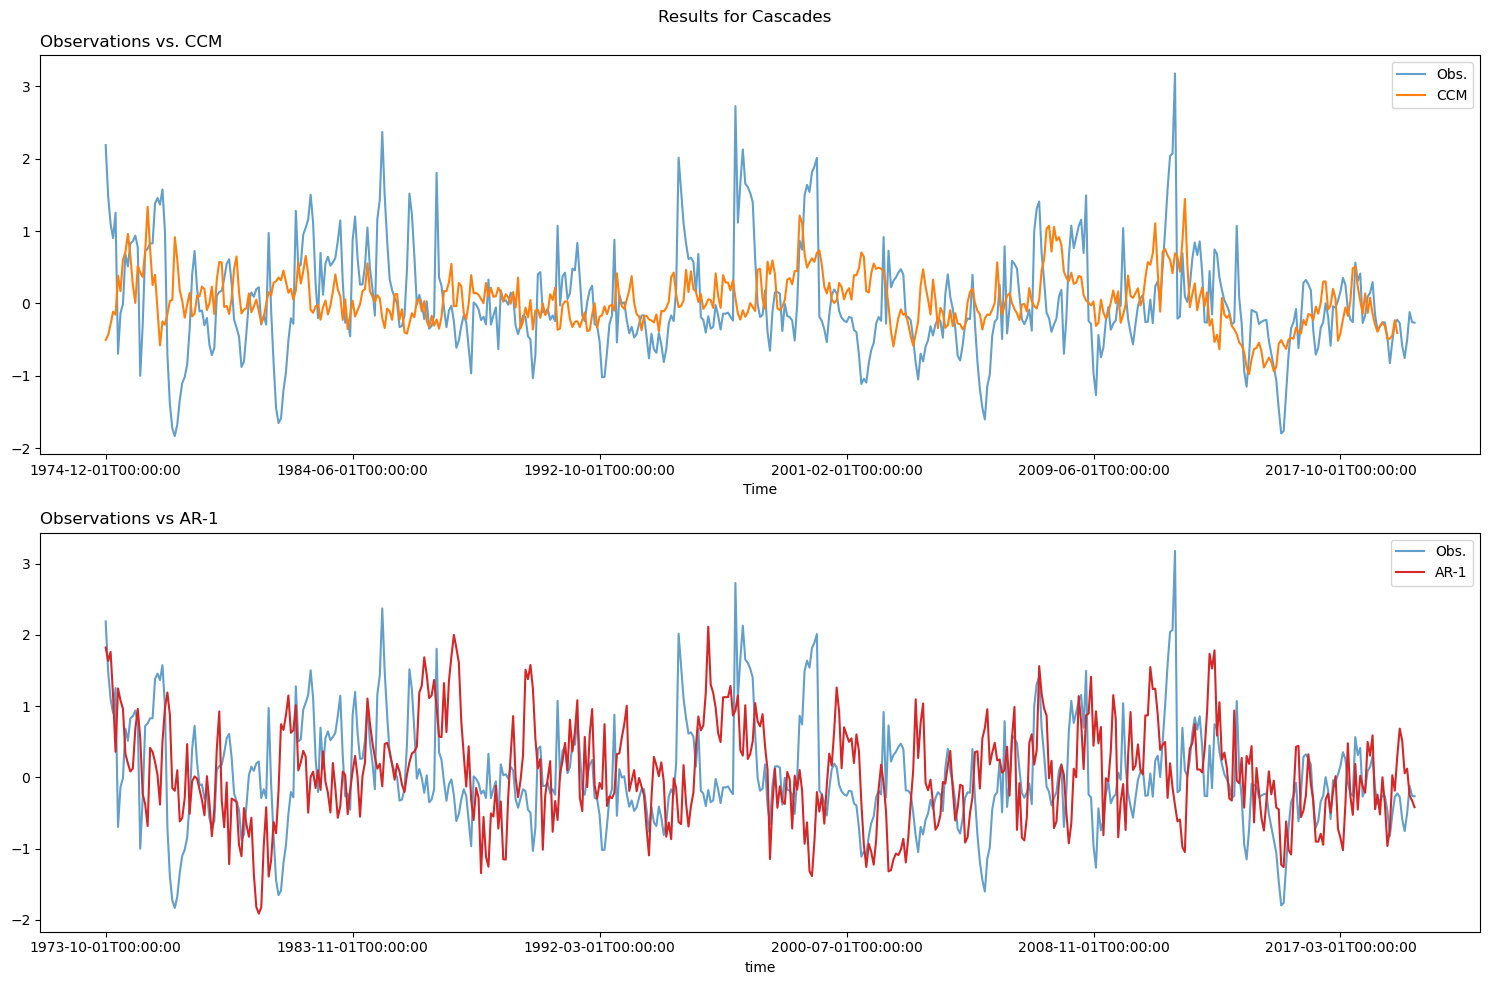

In [340]:
fig = plt.figure(figsize=(15,10))

gs = fig.add_gridspec(2,1)

ax = fig.add_subplot(gs[0])
df.plot(ax=ax, x='time', y='swe_level2', label='Obs.', alpha=0.7)
ccm_results.plot(ax=ax, x='Time', y='Predictions', label='CCM')
ax.set_title('Observations vs. CCM', loc='left')

ax1 = fig.add_subplot(gs[1])
df.plot(ax=ax1, x='time', y='swe_level2', label='Obs.', alpha=0.7)
df.plot(ax=ax1, x='time', y='AR1', label='AR-1', color='tab:red')
ax1.set_title('Observations vs AR-1', loc='left')

plt.suptitle('Results for {}'.format('Cascades'))
plt.tight_layout()

In [112]:
ts.to_numpy().reshape(-1).shape

(492,)

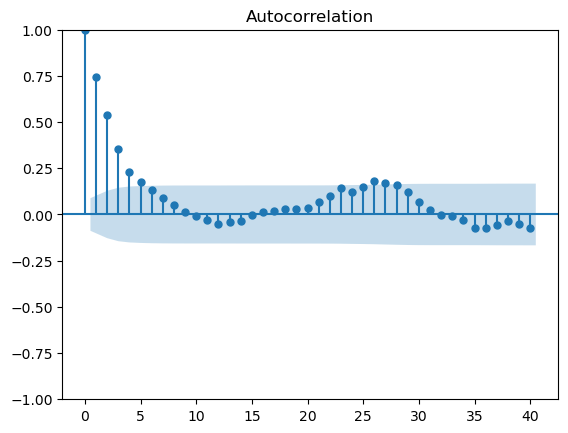

In [78]:
plot_acf(ts.to_numpy().reshape(-1), lags=40)
plt.show()

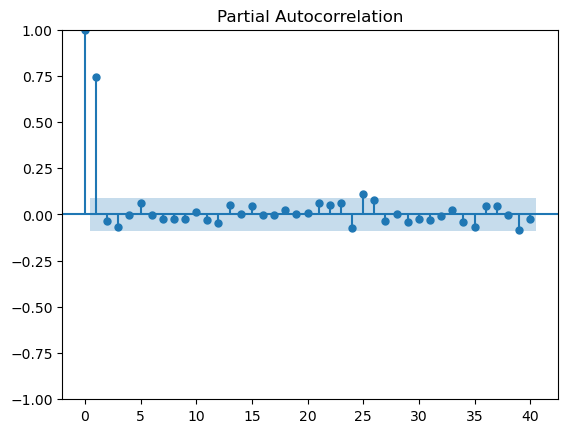

In [79]:
plot_pacf(ts.to_numpy().reshape(-1), lags=40)
plt.show()

In [385]:
from statsmodels.tsa.ar_model import AutoReg

# train_data = ts.to_numpy().reshape(-1)[:400]
# test_data = ts.to_numpy().reshape(-1)[400:]

ar_mod = AutoReg(train_data, lags=2)
trained_mod = ar_mod.fit()

In [159]:
pred = trained_mod.predict(start=400, end=600)

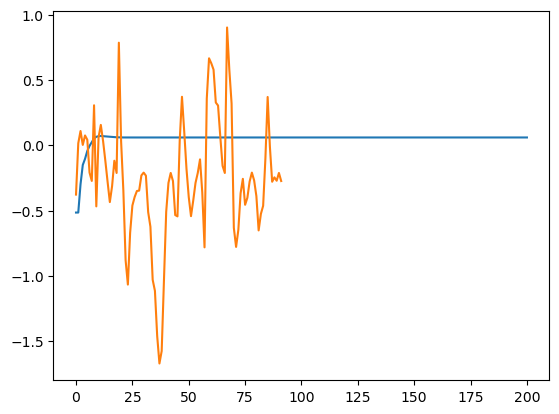

In [160]:
plt.plot(pred)
plt.plot(test_data)
# plt.plot(train_data)

In [386]:
trained_mod.params

array([ 0.01542632,  0.75101094, -0.02277881])

In [378]:
mu

0.028518846

In [379]:
r1

0.7391981889804323

In [153]:
from statsmodels.tsa.stattools import adfuller

In [155]:
adfuller(ts.to_numpy().reshape(-1), autolag='AIC')

(-8.508271969455755,
 1.1864842616104324e-13,
 0,
 491,
 {'1%': -3.4437386290417082,
  '5%': -2.867444458865948,
  '10%': -2.5699148492415413},
 594.4307488417888)

In [231]:
df

,time,swe_level2,sst
0,1978-10-01T00:00:00,-0.523846,0.070282
1,1978-11-01T00:00:00,-0.582581,0.386935
2,1978-12-01T00:00:00,-0.449708,0.474465
3,1979-01-01T00:00:00,-0.730925,0.474786
4,1979-02-01T00:00:00,-0.564041,0.226544
...,...,...,...
487,2019-05-01T00:00:00,-0.279344,0.724249
488,2019-06-01T00:00:00,-0.245479,1.322131
489,2019-07-01T00:00:00,-0.271610,2.194706
490,2019-08-01T00:00:00,-0.211882,2.224361


In [387]:
train_data.mean()

0.053980894